# Index <a name='ind' />
<a href=#loadImp>Import and Load Dataset</a><br>
<a href=#dwh>Data Warehouse (Atoti)</a><br>
<a href=#colrow>Analyzing Rows and Columns</a><br>
<a href=#nanValAna>Analyzing NaN Values</a><br>
<a href=#filtnancol>Filtering out NaN Valued Columns</a><br>
<a href=#discnan>Discard NaN Valued Rows</a><br>
<a href=#cn2con>Coverting Countries to Continent</a><br>
<a href=#cnplot>Country-wise participants frequency</a><br>
<a href=#unvalatt>Unique values frequency in Attributes</a><br>
<a href=#chi2edre>Chi-square Test and Lift (Ed. level vs Remote Work)</a><br>
<a href=#chi2genre>Chi-square Test and Lift (Gender vs Remote Work)</a><br>
<a href=#saldist>Salary Distribution</a><br>
<a href=#kmYCYS>K-means Clutering (Years of Coding vs Yearly Salary)</a><br>
<a href=#cnSal>Country-wise Salary Analysis</a><br>
<a href=#fpa>Frequent Pattern Mining</a><br>
<a href=#dtree>Decision Tree (for salary prediction)</a><br>
<a href=#regress>Linear Regression (for salary prediction)</a><br>

# Import and Load Dataset <a name='loadImp' />
<a href=#ind>Go top</a>

In [1]:
import numpy as np
import pandas as pd
import atoti as tt
import ipywidgets as widgets
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
import pycountry_convert as pc
from geopy.geocoders import Nominatim
import geopandas as gpd
from collections import Counter
import cmd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline

Welcome to atoti 0.7.2!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, set the ATOTI_DISABLE_TELEMETRY environment variable to True.

You can hide this message by setting the ATOTI_HIDE_EULA_MESSAGE environment variable to True.


In [83]:
#Loading SODS

df = pd.read_csv("survey_results_public.csv")
df

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73264,73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73265,73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN
73266,73267,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training,NaN,NaN,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN


# Data Warehouse (Atoti)<a name='dwh' />
<a href=#ind>Go top</a>

In [85]:
# https://docs.atoti.io/latest/getting_started/tutorial/tutorial.html

session = tt.Session()
sods = session.read_csv(
    "survey_results_public.csv"
)
cube = session.create_cube(sods, name = "sods_all_att")
cube

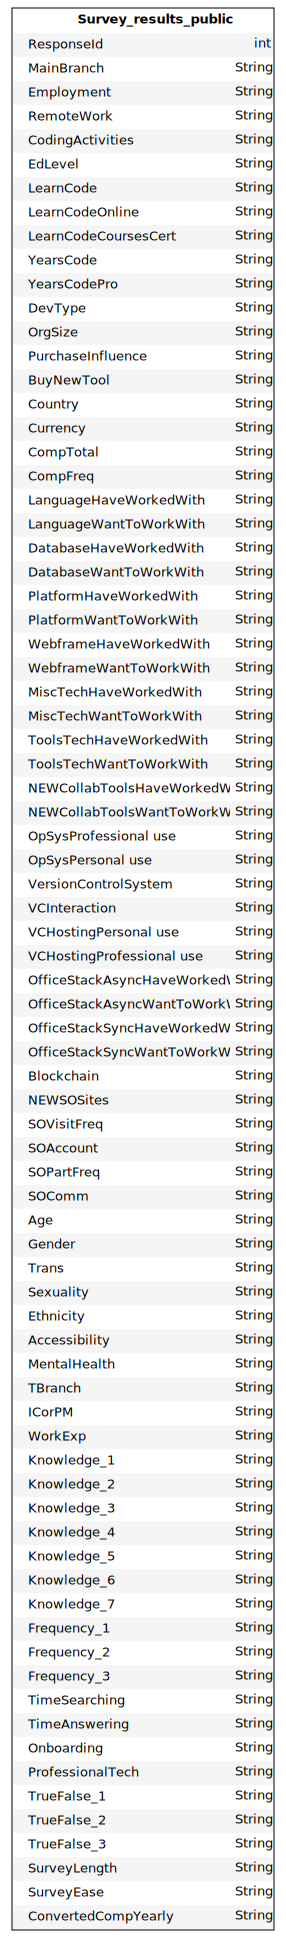

In [86]:
cube.schema

In [87]:
session.link()

Open the notebook in JupyterLab with the atoti extension enabled to see this link.

# Analyzing Rows and Colums <a name='colrow' />
<a href=#ind> Go top</a>

In [3]:
cols = list(df.columns)
n_of_cols = len(cols)
n_of_rows = df.shape[0]
print('# cols in SODS:', n_of_cols)
print('# rows in SODS:', n_of_rows)

print('\nColumns:\n')
for nCols in cols:
      print(nCols)

# cols in SODS: 79
# rows in SODS: 73268

Columns:

ResponseId
MainBranch
Employment
RemoteWork
CodingActivities
EdLevel
LearnCode
LearnCodeOnline
LearnCodeCoursesCert
YearsCode
YearsCodePro
DevType
OrgSize
PurchaseInfluence
BuyNewTool
Country
Currency
CompTotal
CompFreq
LanguageHaveWorkedWith
LanguageWantToWorkWith
DatabaseHaveWorkedWith
DatabaseWantToWorkWith
PlatformHaveWorkedWith
PlatformWantToWorkWith
WebframeHaveWorkedWith
WebframeWantToWorkWith
MiscTechHaveWorkedWith
MiscTechWantToWorkWith
ToolsTechHaveWorkedWith
ToolsTechWantToWorkWith
NEWCollabToolsHaveWorkedWith
NEWCollabToolsWantToWorkWith
OpSysProfessional use
OpSysPersonal use
VersionControlSystem
VCInteraction
VCHostingPersonal use
VCHostingProfessional use
OfficeStackAsyncHaveWorkedWith
OfficeStackAsyncWantToWorkWith
OfficeStackSyncHaveWorkedWith
OfficeStackSyncWantToWorkWith
Blockchain
NEWSOSites
SOVisitFreq
SOAccount
SOPartFreq
SOComm
Age
Gender
Trans
Sexuality
Ethnicity
Accessibility
MentalHealth
TBranch
ICorPM
WorkEx

# Analyzing NaN values <a name='nanValAna' />
<a href=#ind>Go top</a>

In [4]:
check_nan = df[cols].isnull().sum()
check_nan = check_nan/n_of_rows*100
dicts = dict(zip(cols, check_nan))
# for (key, value) in dicts.items():
#     print(key,': ' ,value)

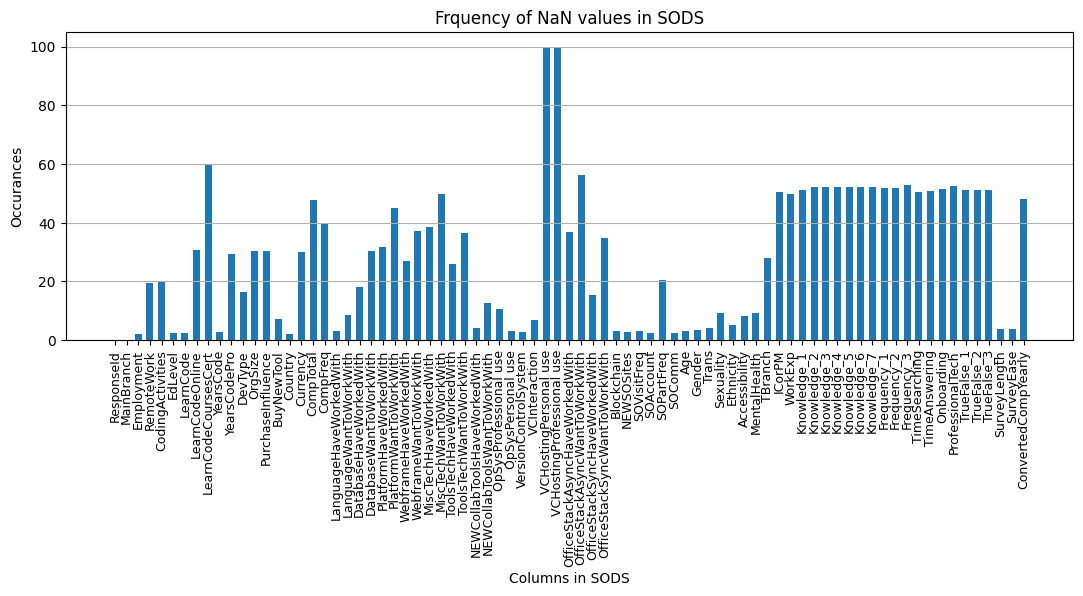

In [5]:
# Plotting column-wise null values
plt.rcParams['figure.figsize'] = [13, 4]
plt.rcParams['figure.dpi'] = 100
plt.bar(cols, check_nan, width = .6)
plt.xticks(rotation='vertical',fontsize = 9)
plt.title('Frquency of NaN values in SODS')
plt.xlabel('Columns in SODS')
plt.ylabel('Occurances')
plt.grid(axis='y')
plt.show()

# Filtering out NaN valued columns <a name='filtnancol' />
<a href=#ind>Go top</a>

In [6]:
Th = 50
newDict = dict()

for (key, value) in dicts.items():
    if value <= Th:
        newDict[key] = value
print('Filtered Dictionary : ')
for (key, value) in newDict.items():
#     print(key,': ' ,value)
    print(key, ': %.3f' % (value))

Filtered Dictionary : 
ResponseId : 0.000
MainBranch : 0.000
Employment : 2.128
RemoteWork : 19.531
CodingActivities : 19.612
EdLevel : 2.316
LearnCode : 2.304
LearnCodeOnline : 30.822
YearsCode : 2.644
YearsCodePro : 29.256
DevType : 16.332
OrgSize : 30.339
PurchaseInfluence : 30.435
BuyNewTool : 7.241
Country : 2.043
Currency : 30.032
CompTotal : 47.560
CompFreq : 39.366
LanguageHaveWorkedWith : 3.130
LanguageWantToWorkWith : 8.518
DatabaseHaveWorkedWith : 17.944
DatabaseWantToWorkWith : 30.373
PlatformHaveWorkedWith : 31.861
PlatformWantToWorkWith : 44.839
WebframeHaveWorkedWith : 26.920
WebframeWantToWorkWith : 37.050
MiscTechHaveWorkedWith : 38.593
MiscTechWantToWorkWith : 49.760
ToolsTechHaveWorkedWith : 26.065
ToolsTechWantToWorkWith : 36.444
NEWCollabToolsHaveWorkedWith : 3.987
NEWCollabToolsWantToWorkWith : 12.502
OpSysProfessional use : 10.598
OpSysPersonal use : 3.146
VersionControlSystem : 2.578
VCInteraction : 6.977
OfficeStackAsyncHaveWorkedWith : 36.912
OfficeStackSyncHa

# Discard NaN valued rows <a name='discnan' />
<a href=#ind>Go top</a>

In [7]:
# Removing entries with multiple NaN values

#att = ['Employment', 'EdLevel', 'Country', 'LearnCode']
att = newDict.keys()
df[att].dropna()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,YearsCode,YearsCodePro,...,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,WorkExp,SurveyLength,SurveyEase,ConvertedCompYearly
11,12,"I am not primarily a developer, but I write co...","Employed, full-time;Independent contractor, fr...",Fully remote,Hobby;Contribute to open-source projects;Freel...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,12,10,...,No,Straight / Heterosexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",Yes,14.0,Too short,Easy,194400.0
14,15,I am a developer by profession,"Employed, full-time;Independent contractor, fr...",Fully remote,Hobby;Freelance/contract work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Written Tutorials;Stack Overflow;Video-based O...,11,5,...,No,Straight / Heterosexual,White,None of the above,None of the above,Yes,5.0,Appropriate in length,Easy,110000.0
25,26,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,16,9,...,No,Straight / Heterosexual,White;European,None of the above,None of the above,Yes,9.0,Appropriate in length,Neither easy nor difficult,90647.0
51,52,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,7,3,...,No,Straight / Heterosexual,White;European,None of the above,"I have a mood or emotional disorder (e.g., dep...",Yes,3.0,Appropriate in length,Neither easy nor difficult,38856.0
55,56,I am a developer by profession,"Employed, full-time",Fully remote,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Written Tutorials;Stac...,9,5,...,No,Straight / Heterosexual,Black;Caribbean,None of the above,None of the above,Yes,5.0,Appropriate in length,Easy,141000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73072,73073,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Written Tutorials;Stac...,7,6,...,Yes,Bisexual,Asian,None of the above,None of the above,Yes,3.0,Appropriate in length,Neither easy nor difficult,39000.0
73089,73090,I am a developer by profession,"Employed, full-time;Independent contractor, fr...",Fully remote,Hobby;Freelance/contract work,Some college/university study without earning ...,Books / Physical media;Friend or family member...,Technical documentation;Blogs;Written Tutorial...,10,8,...,No,Straight / Heterosexual,Hispanic or Latino/a,None of the above,None of the above,Yes,10.0,Appropriate in length,Easy,180000.0
73093,73094,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Bootstrapping a business,Some college/university study without earning ...,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,5,5,...,No,Straight / Heterosexual,White;European,None of the above,"I have learning differences (e.g., Dyslexic, D...",Yes,5.0,Appropriate in length,Neither easy nor difficult,66600.0
73101,73102,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,18,14,...,No,Straight / Het

# Converting countries to continents <a name='cn2con' />
<a href=#ind>Go top</a>

In [8]:
# https://stackoverflow.com/questions/55910004/get-continent-name-from-country-using-pycountry

def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    except:
        country_alpha2 = 'Unknown'
#     print(country_alpha2)
    try:
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    except:
        country_continent_code = 'Unknown'
    try:
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    except:
        country_continent_name = 'Unknown'
    return country_continent_name

In [9]:
def country_name_process(countryNoNan, old_name, new_name):
    for i in range(0, len(old_name)):
        countryNoNan = countryNoNan.replace(old_name[i], new_name[i])
    return countryNoNan
    

In [10]:
countryNoNan = df['Country'].dropna()
# cnSalNoNan = df[['Country', 'ConvertedCompYearly']].dropna()
# countryNoNan = countryNoNan.replace('Hong Kong (S.A.R.)', 'Hong Kong')
# countryNoNan = countryNoNan.replace('Iran, Islamic Republic of...', 'Iran')
# countryNoNan = countryNoNan.replace('The former Yugoslav Republic of Macedonia', 'North Macedonia')
old_name = ['Hong Kong (S.A.R.)',
            'Iran, Islamic Republic of...',
            'The former Yugoslav Republic of Macedonia',
            'Republic of Korea',
            'Congo, Republic of the...',
            'Timor-Leste']
new_name = ['Hong Kong',
            'Iran',
            'North Macedonia',
            'South Korea',
            'Republic of the Congo',
            'Democratic Republic of Timor-Leste']
countryNoNan = country_name_process(countryNoNan, old_name, new_name)
# print(countryNoNan.unique())

In [11]:
countries = countryNoNan.unique()
countriesV = []
for c in countries:
    if c != 'Nomadic':
        countriesV.append(c)
        print(c,':',country_to_continent(c))
# countriesV
# country_to_continent('Iran')

Canada : North America
United Kingdom of Great Britain and Northern Ireland : Europe
Israel : Asia
United States of America : North America
Germany : Europe
India : Asia
Netherlands : Europe
Croatia : Europe
Australia : Oceania
Russian Federation : Europe
Czech Republic : Europe
Austria : Europe
Serbia : Europe
Italy : Europe
Ireland : Europe
Poland : Europe
Slovenia : Europe
Iraq : Asia
Sweden : Europe
Madagascar : Africa
Norway : Europe
Taiwan : Asia
Hong Kong : Asia
Mexico : North America
France : Europe
Brazil : South America
Lithuania : Europe
Uruguay : South America
Denmark : Europe
Spain : Europe
Egypt : Africa
Turkey : Asia
South Africa : Africa
Ukraine : Europe
Finland : Europe
Romania : Europe
Portugal : Europe
Singapore : Asia
Oman : Asia
Belgium : Europe
Chile : South America
Bulgaria : Europe
Latvia : Europe
Philippines : Asia
Greece : Europe
Belarus : Europe
Saudi Arabia : Asia
Kenya : Africa
Switzerland : Europe
Iceland : Europe
Viet Nam : Asia
Thailand : Asia
China : As

In [12]:
len(countries)

179

# Country-wise participants frequency <a name='cnplot'/>
<a href=#ind>Go top</a>

In [13]:
# from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="DataMining")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

# countryNoNan = set_with_no_nan('Country')
countryFrq = countryNoNan.value_counts()
# countryFrq['Hong Kong']

In [14]:
# count = countryNoNan['country'].value_counts()
# countryNoNan.unique()
CountryDict = dict()
for i in countriesV:
    cord = geolocate(i)
    try:
        CountryDict[i] = [cord, countryFrq[i]]
    except:
        print(i, 'has problem')

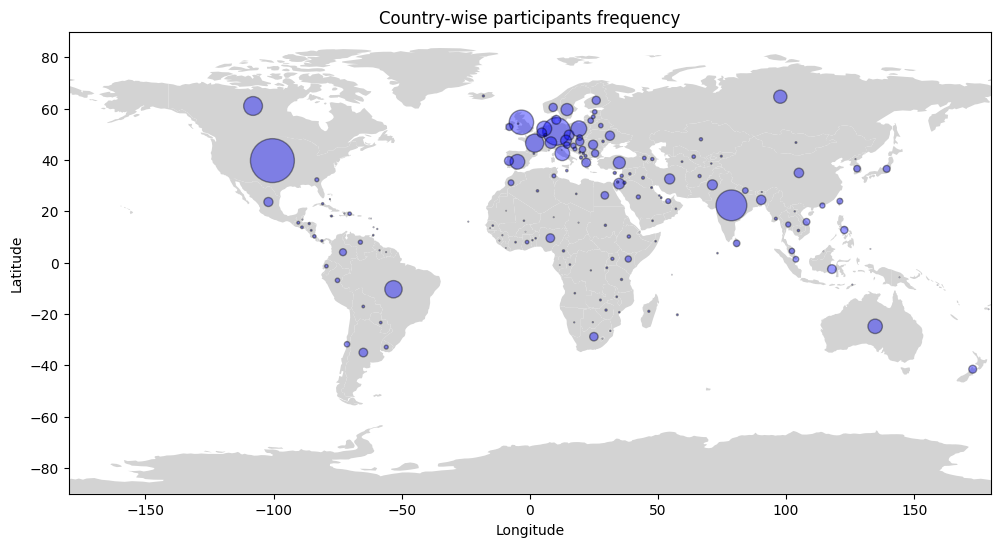

In [15]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
# worldmap = worldmap[['continent', 'geometry', 'pop_est']]
# continents = worldmap.dissolve(by='continent', aggfunc='sum')

fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(ax=ax, color = 'lightgray')
# continents.plot(column = 'pop_est', cmap='YlOrRd', scheme='boxplot', ax=ax);
x = []
y = []
z = []
threshold = 10
for ck in CountryDict:
    x.append(CountryDict[ck][0][1])
    y.append(CountryDict[ck][0][0])
    z.append(CountryDict[ck][1])

z = (z/max(z))*1000
# cz= z/max(z)
# cz = ds['ConvertedCompYearly']
# cz= cz/max(cz)
# print(len(x))
# plt.scatter(x, y, s=z, c=cz, alpha=0.6, vmin=0, vmax=max(cz), cmap='coolwarm')
plt.scatter(x, y, s=z, c='blue', alpha=0.4, edgecolor='black', linewidth=1)

# plt.colorbar(label='Occurance')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Country-wise participants frequency")
plt.show()

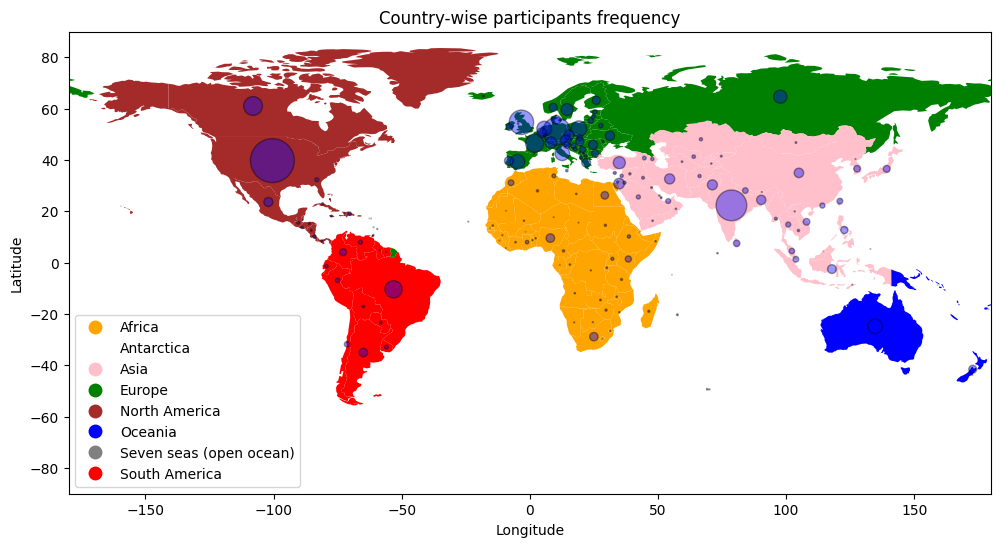

In [16]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
# worldmap = worldmap[['continent', 'geometry', 'pop_est']]
# continents = worldmap.dissolve(by='continent', aggfunc='sum')
color_dict = {'Africa':'orange', 'Antarctica':'white', 'Asia':'pink', 
              'Europe':'green', 'North America':'brown',
              'Oceania':'blue', 'Seven seas (open ocean)':'gray',
              'South America':'red'}

fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(ax=ax, column="continent", legend=True, cmap=colors.ListedColormap(list(color_dict.values())))
# continents.plot(column = 'pop_est', cmap='YlOrRd', scheme='boxplot', ax=ax);
x = []
y = []
z = []
threshold = 10
for ck in CountryDict:
    x.append(CountryDict[ck][0][1])
    y.append(CountryDict[ck][0][0])
    z.append(CountryDict[ck][1])

z = (z/max(z))*1000
# cz= z/max(z)
# cz = ds['ConvertedCompYearly']
# cz= cz/max(cz)
# print(len(x))
# plt.scatter(x, y, s=z, c=cz, alpha=0.6, vmin=0, vmax=max(cz), cmap='coolwarm')
plt.scatter(x, y, s=z, c='blue', alpha=0.4, edgecolor='black', linewidth=1)

# plt.colorbar(label='Occurance')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Country-wise participants frequency")
plt.show()

# Unique values frequency in Attributes <a name ='unvalatt' />
<a href=#ind>Go top</a>

In [17]:
# print(newDict)
att = dicts.keys()
attDict = dict()
for (key, value) in dicts.items():
    attDict[key] = [value]
# attDict
for i in att:
    a = df[i].dropna().unique()
    attDict[i].append(len(a))
    attDict[i].append(a)

# attDict['MainBranch']

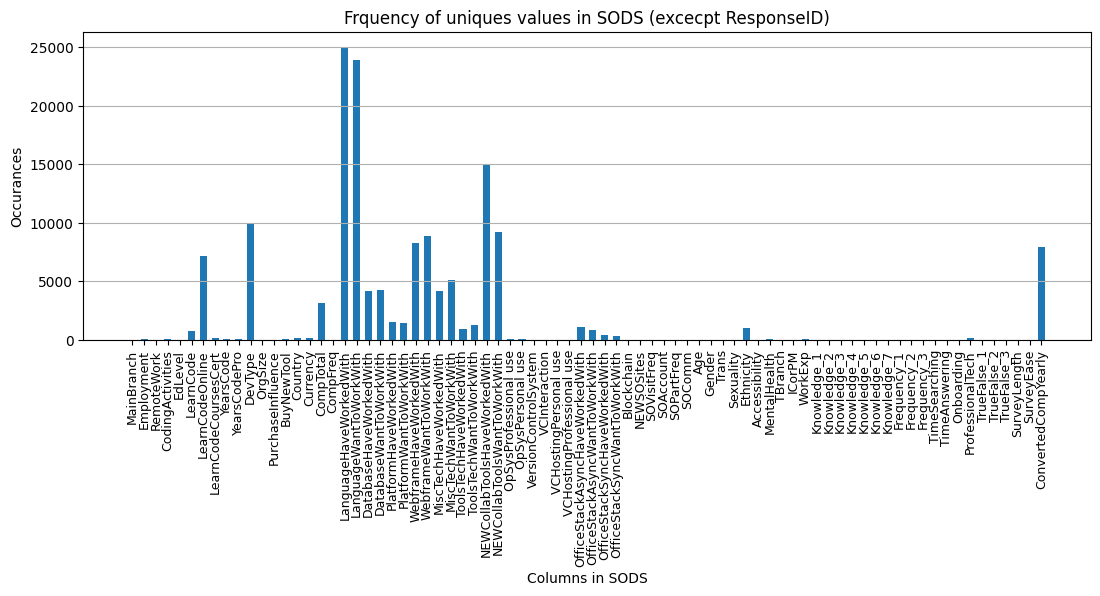

In [18]:
# Plotting column-wise null values
# att = newDict.keys()
# att
uAtt = []
for i in att:
    uAtt.append(attDict[i][1])
att
plt.rcParams['figure.figsize'] = [13, 4]
plt.rcParams['figure.dpi'] = 100
plt.bar(cols[1:len(cols)], uAtt[1:len(uAtt)], width = .6)
plt.xticks(rotation='vertical',fontsize = 9)
plt.title('Frquency of uniques values in SODS (excecpt ResponseID)')
plt.xlabel('Columns in SODS')
plt.ylabel('Occurances')
plt.grid(axis='y')
plt.show()

# Chi-square Test and Lift (Ed. Level vs Remote Work) <a name='chi2edre' />
<a href=#ind>Go top</a>

In [19]:
def lift_corr(contigency_pct):
    ct = contigency_pct.to_numpy()
    sm = np.sum(ct)
    csm = np.sum(ct, axis=0)
    rsm = np.sum(ct, axis=1)
    r = np.size(ct, 0)
    c = np.size(ct, 1)
    for i in range(0, r):
        pn = ''
        for j in range(0, c):
            k=(ct[i,j]/sm)/((csm[j]/sm)*(rsm[i]/sm))
            if k > 1:
                pn = '+ve'
            elif k < 1:
                pn = '-ve'
            else:
                pn = 'ind'
            print(pn, end='\t')
        print('')

In [20]:
def chi_oe(contigency_pct, expected):
    ob = contigency_pct.to_numpy()
    oe = ob-expected
    out = np.where(oe>0,'+ve','-ve')
#     print(out)
    r = np.size(out, 0)
    c = np.size(out, 1)
    for i in range(0, r):
        for j in range(0, c):
            print(out[i,j], end='\t')
        print('')

In [21]:
d = pd.DataFrame(df[['EdLevel', 'RemoteWork']])
# d.loc[d['EdLevel'] != 'Other doctoral degree (Ph.D., Ed.D., etc.)'] = 'Non-PhD'
# d.loc[d['EdLevel'] == 'Other doctoral degree (Ph.D., Ed.D., etc.)'] = 'PhD'
d['EdLevel'] = np.where(d['EdLevel'] != 'Other doctoral degree (Ph.D., Ed.D., etc.)','Non-PhD', d['EdLevel'])
d['EdLevel'] = np.where(d['EdLevel'] == 'Other doctoral degree (Ph.D., Ed.D., etc.)','PhD', d['EdLevel'])
d['RemoteWork'] = np.where(d['RemoteWork'] == 'Hybrid (some remote, some in-person)','Hybrid', d['RemoteWork'])
# d['RemoteWork'].unique()
d_nonnan = d.dropna()
d_nonnan
# df[['EdLevel', 'RemoteWork']]

,EdLevel,RemoteWork
1,Non-PhD,Fully remote
2,Non-PhD,Hybrid
3,Non-PhD,Fully remote
4,Non-PhD,Hybrid
8,Non-PhD,Hybrid
...,...,...
73263,Non-PhD,Fully remote
73264,Non-PhD,Full in-person
73265,Non-PhD,Hybrid
73266,Non-PhD,Hybrid


In [22]:
# https://predictivehacks.com/how-to-run-chi-square-test-in-python/
# https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
contigency_pct = pd.crosstab(d_nonnan['EdLevel'], d_nonnan['RemoteWork'])
c, p, dof, expected = chi2_contingency(contigency_pct)
print('Chi2 analysis for Ed. level vs. Remote Work Mode')
print('chi2 value, c: %.3f' %c)
# print('p-value:', p)
print('dof:',dof)
print('expected:')
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in expected]))
contigency_pct

Chi2 analysis for Ed. level vs. Remote Work Mode
chi2 value, c: 155.039
dof: 2
expected:
8297.987448692289	24462.459276094847	24153.553275212864
298.01255130771057	878.5407239051528	867.4467247871366


RemoteWork,Full in-person,Fully remote,Hybrid
EdLevel,,,
Non-PhD,8294,24720,23900
PhD,302,621,1121


In [23]:
prob = 0.05
critical = chi2.ppf(prob, dof)
if abs(c) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

chi_oe(contigency_pct, expected)

Dependent (reject H0)
-ve	+ve	-ve	
+ve	-ve	+ve	


In [24]:
lift_corr(contigency_pct)

-ve	+ve	-ve	
+ve	-ve	+ve	


# Chi-square Test and Lift (Gender vs Remote Work) <a name='chi2genre' />
<a href=#ind>Go top</a>

In [25]:
dg = pd.DataFrame(df[['Gender', 'RemoteWork']]).dropna()
dg.loc[dg['Gender'].str.contains('Woman'), 'Gender'] = 'Female'
dg.loc[dg['Gender'].str.contains('Man'), 'Gender'] = 'Male'
dg.loc[dg['Gender'].str.contains('queer'), 'Gender'] = 'Others'
dg.loc[dg['Gender'].str.contains('Or'), 'Gender'] = 'Others'
dg.loc[dg['Gender'].str.contains('say'), 'Gender'] = 'Others'
dg['RemoteWork'] = np.where(dg['RemoteWork'] == 'Hybrid (some remote, some in-person)','Hybrid', dg['RemoteWork'])
# d.loc[d['Gender'] != 'Male' and d['Gender'] != 'Female'] = 'Others'
dg

,Gender,RemoteWork
2,Male,Hybrid
3,Male,Fully remote
8,Female,Hybrid
9,Female,Fully remote
10,Male,Hybrid
...,...,...
73263,Male,Fully remote
73264,Male,Full in-person
73265,Male,Hybrid
73266,Male,Hybrid


In [26]:
# https://predictivehacks.com/how-to-run-chi-square-test-in-python/
# https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
contigency_pct2 = pd.crosstab(dg['Gender'], dg['RemoteWork'])
c, p, dof, expected = chi2_contingency(contigency_pct2)
print('Chi2 analysis for Gender vs. Remote Work Mode')
print('chi2 value, c: %.3f' %c)
# print('p-value:', p)
print('dof:',dof)
print('expected:')
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in expected]))

contigency_pct2

Chi2 analysis for Gender vs. Remote Work Mode
chi2 value, c: 13.950
dof: 4
expected:
427.3836586955776	1263.7488249219473	1247.867516382475
7835.706384876659	23169.731773424366	22878.561841698975
213.90995642776272	632.5194016536865	624.5706419185508


RemoteWork,Full in-person,Fully remote,Hybrid
Gender,,,
Female,415,1341,1183
Male,7870,23057,22957
Others,192,668,611


In [27]:
prob = 0.05
critical = chi2.ppf(prob, dof)
if abs(c) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
chi_oe(contigency_pct2, expected)

Dependent (reject H0)
-ve	+ve	-ve	
+ve	-ve	+ve	
-ve	+ve	-ve	


In [28]:
lift_corr(contigency_pct2)

-ve	+ve	-ve	
+ve	-ve	+ve	
-ve	+ve	-ve	


# Salary Distribution Analysis <a name='saldist' />
<a href=#ind>Go top</a>

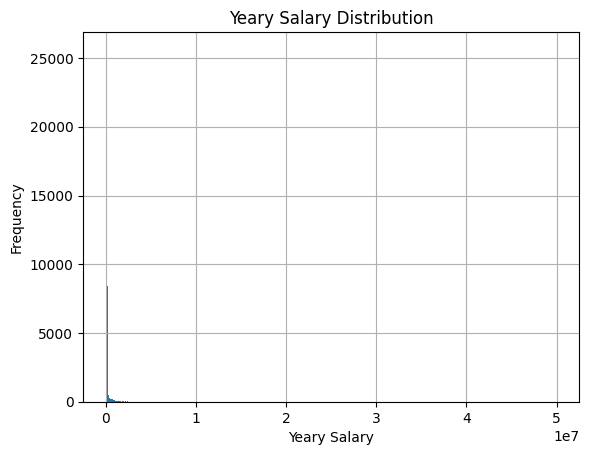

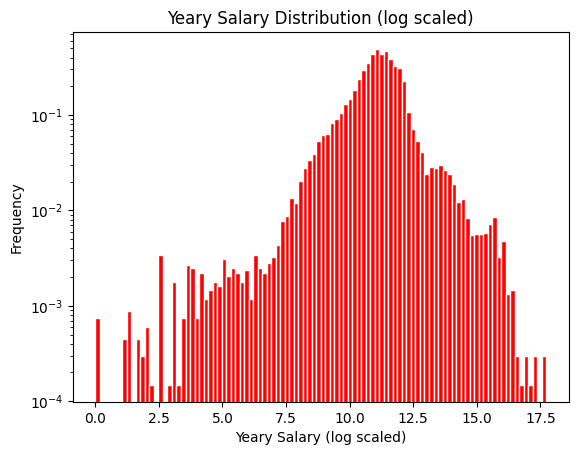

In [4]:
op = df["ConvertedCompYearly"].dropna()
# op1 = op/max(op)
op1 = op
plt.hist(op1, bins=500, range=(0,max(op1)))
plt.xlabel('Yeary Salary')
plt.ylabel('Frequency')
plt.title('Yeary Salary Distribution')
plt.grid()
plt.show()

op2 = np.log(op)
plt.hist(op2, bins=100, range=(0,max(op2)), color = 'red', edgecolor = 'white', density=True, log=True)
plt.xlabel('Yeary Salary (log scaled)')
plt.ylabel('Frequency')
plt.title('Yeary Salary Distribution (log scaled)')
# plt.grid()
plt.show()

# K-means Clutering (Years of Coding vs Yearly Salary) <a name='kmYCYS' />
<a href=#ind>Go top</a>

In [30]:
dy = df[['YearsCode', 'ConvertedCompYearly']].dropna()
dy = pd.DataFrame(dy)
dy['YearsCode'] = np.where(dy['YearsCode'] == 'More than 50 years','50', dy['YearsCode'])
dy['YearsCode'] = np.where(dy['YearsCode'] == 'Less than 1 year','1', dy['YearsCode'])
dy['YearsCode'] = dy['YearsCode'].astype(float)
dy['ConvertedCompYearly'] = dy['ConvertedCompYearly'].astype(float)
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(dy[['YearsCode', 'ConvertedCompYearly']])
dy['label'] = label
centroids = kmeans.cluster_centers_
print('centroids:\n', centroids)

centroids:
 [[1.43462920e+01 8.78744282e+04]
 [1.99482759e+01 1.10538050e+07]
 [1.45116279e+01 5.36495047e+06]
 [7.80000000e+00 3.82288328e+07]
 [1.66507772e+01 1.32286702e+06]]


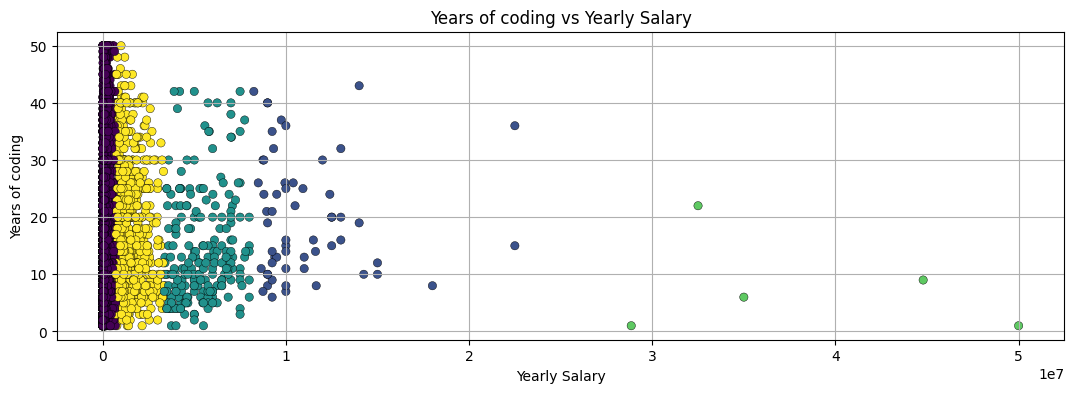

In [31]:
x = dy['ConvertedCompYearly']
y = dy['YearsCode']
plt.scatter(x, y, c = label, edgecolor='black', linewidth=0.3)
plt.xlabel('Yearly Salary')
plt.ylabel('Years of coding')
plt.title('Years of coding vs Yearly Salary')
plt.grid()
plt.show()

# Country-wise Salary Analysis <a name='cnSal' />
<a href=#ind>Go top</a>

In [32]:
ds = df[['Country', 'ConvertedCompYearly']]
ds = pd.DataFrame(ds)
old_name = ['Hong Kong (S.A.R.)',
            'Iran, Islamic Republic of...',
            'The former Yugoslav Republic of Macedonia',
            'Republic of Korea',
            'Congo, Republic of the...',
            'Timor-Leste']
new_name = ['Hong Kong',
            'Iran',
            'North Macedonia',
            'South Korea',
            'Republic of the Congo',
            'Democratic Republic of Timor-Leste']
ds = country_name_process(ds, old_name, new_name)
ds = pd.DataFrame(ds)

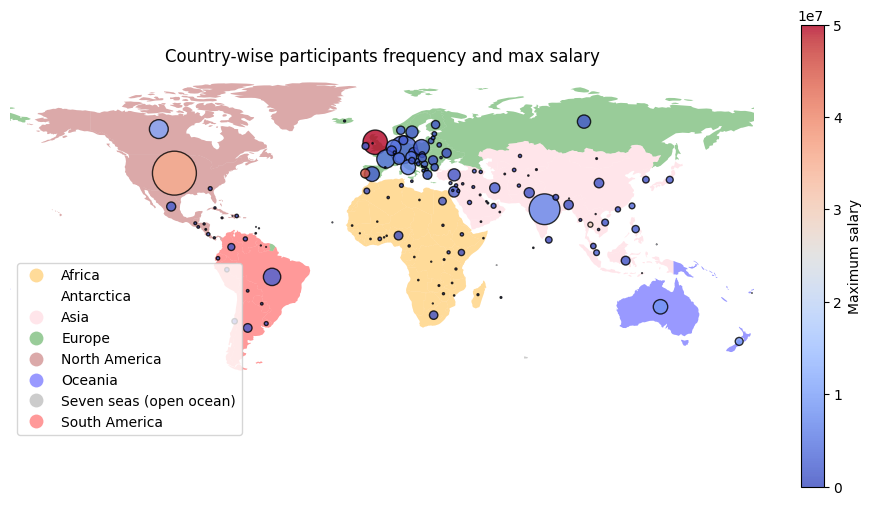

In [33]:
# ds2 = ds.groupby('Country')['ConvertedCompYearly'].mean()
ds2 = ds.groupby('Country')['ConvertedCompYearly'].max()

worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
color_dict = {'Africa':'orange', 'Antarctica':'white', 'Asia':'pink', 
              'Europe':'green', 'North America':'brown',
              'Oceania':'blue', 'Seven seas (open ocean)':'gray',
              'South America':'red'}

fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(ax=ax, alpha=0.4, column="continent", legend=True, cmap=colors.ListedColormap(list(color_dict.values())))
x = []
y = []
z = []
d = []

for ck in CountryDict:
    x.append(CountryDict[ck][0][1])
    y.append(CountryDict[ck][0][0])
    z.append(CountryDict[ck][1])
    d.append(ds2[ck])
    
z = (z/max(z))*1000
# d = np.log(d)
plt.scatter(x, y, s=z, c=d, alpha=0.8, vmin=0, vmax=max(d), cmap='coolwarm',  edgecolor='black', linewidth=1)
# plt.scatter(x, y, s=z, c='blue', alpha=0.3)

plt.colorbar(label='Maximum salary')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Country-wise participants frequency and max salary")
plt.axis('off')
plt.show()

# ds2['United States of America']
# ds2

# Frequent Pattern Mining: "LanguageHaveWorkedWith" <a name='fpa' />
<a href=#ind>Go top</a>

In [34]:
dl = df['LanguageHaveWorkedWith'].dropna()
dataset = []
for txt in dl:
    x = txt.split(";")
    dataset.append(x)
# dataset
pd.DataFrame(dl)

,LanguageHaveWorkedWith
1,JavaScript;TypeScript
2,C#;C++;HTML/CSS;JavaScript;Python
3,C#;JavaScript;SQL;TypeScript
4,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript
5,C++;Lua
...,...
73263,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...
73264,Bash/Shell;HTML/CSS;JavaScript;Python;SQL
73265,HTML/CSS;JavaScript;PHP;Python;SQL
73266,C#;Delphi;VBA


In [45]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
dfa = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(dfa, min_support=0.4, use_colnames=True)
# frequent_itemsets['itemsets']
# frequent_itemsets = fpgrowth(dfa, min_support=0.4, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.551490,(HTML/CSS)
1,0.654357,(JavaScript)
2,0.481226,(Python)
3,0.494921,(SQL)
4,0.490525,"(HTML/CSS, JavaScript)"


# Decision Tree (for salary prediction)<a name='dtree' />
<a href=#ind>Go top</a>

In [5]:
# dc = df[['Age','EdLevel', 'YearsCode', 'ConvertedCompYearly']].dropna()
# dc = pd.DataFrame(dc)
# dc
# ID = df['ResponseId']

dl = df['LanguageHaveWorkedWith']
dataset = []
for txt in dl:
    if type(txt) == str:
        x = txt.split(";")
        dataset.append(x)
    
dataset

res = sorted(list(set(i for j in dataset for i in j)))
# print(res)
# cli = cmd.Cmd()
cmd.Cmd().columnize(res, displaywidth=80)
res = ['C#', 'C++', 'Java', 'JavaScript', 'PHP', 'Python', 'Ruby', 'SQL']
edf = pd.DataFrame(columns=[res], index=range(0, df.shape[0]))
# edf.insert(0, 'ResponseId', ID)
# edf = edf.fillna(0)
edf

APL         COBOL    Erlang    Haskell     Lua          PowerShell  SQL       
Assembly    Clojure  F#        Java        MATLAB       Python      Scala     
Bash/Shell  Crystal  Fortran   JavaScript  OCaml        R           Solidity  
C           Dart     Go        Julia       Objective-C  Ruby        Swift     
C#          Delphi   Groovy    Kotlin      PHP          Rust        TypeScript
C++         Elixir   HTML/CSS  LISP        Perl         SAS         VBA       


,C#,C++,Java,JavaScript,PHP,Python,Ruby,SQL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
73263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
edf1 = edf.fillna(0)
dl = df['LanguageHaveWorkedWith']
list_one = res
for k in range(0, len(edf1)):
    txt = dl[k]
    if type(txt) == str:
        list_two = txt.split(";")
        ids = []
        for i in range(len(list_two)):
            for j in range(len(list_one)):
                if list_two[i]==list_one[j]:
                    ids.append(j)
        edf1.iloc[k, ids] = 1
edf1
# edf1.to_csv('./edf1.csv')
# k

,C#,C++,Java,JavaScript,PHP,Python,Ruby,SQL
0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0
2,1,1,0,1,0,1,0,0
3,1,0,0,1,0,0,0,1
4,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
73263,0,0,0,1,1,1,0,1
73264,0,0,0,1,0,1,0,1
73265,0,0,0,1,1,1,0,1
73266,1,0,0,0,0,0,0,0


In [7]:
edf1.to_csv('./edf1.csv')
edf1

,C#,C++,Java,JavaScript,PHP,Python,Ruby,SQL
0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0
2,1,1,0,1,0,1,0,0
3,1,0,0,1,0,0,0,1
4,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
73263,0,0,0,1,1,1,0,1
73264,0,0,0,1,0,1,0,1
73265,0,0,0,1,1,1,0,1
73266,1,0,0,0,0,0,0,0


In [8]:
# del edf2
# edf2 = pd.read_csv('./edf1.csv')
edf2 = edf1.copy()
list_cols = ['Age','YearsCode', 'WorkExp', 'ConvertedCompYearly']
dy = df[list_cols]
for lc in list_cols:
    dy = df[lc]
    edf2.insert(len(edf2.columns), lc, dy)
# dy = pd.DataFrame(dy)
# edf2.join(dy)
# # edf2
# edf2 = pd.concat([edf2, dy], axis = 1)
# # dy = df['ConvertedCompYearly']
# edf2.insert(1, 'ConvertedCompYearly', dy)
# g = [edf2, dy]
# g = pd.concat([edf2, dy.reindex(edf2.index)], axis=1)
# g
edf2

,C#,C++,Java,JavaScript,PHP,Python,Ruby,SQL,Age,YearsCode,WorkExp,ConvertedCompYearly
0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,0,0,0,1,0,0,0,0,NaN,NaN,NaN,NaN
2,1,1,0,1,0,1,0,0,25-34 years old,14,NaN,40205.0
3,1,0,0,1,0,0,0,1,35-44 years old,20,NaN,215232.0
4,1,0,0,1,0,0,0,1,25-34 years old,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
73263,0,0,0,1,1,1,0,1,25-34 years old,8,5.0,NaN
73264,0,0,0,1,0,1,0,1,25-34 years old,6,6.0,NaN
73265,0,0,0,1,1,1,0,1,55-64 years old,42,42.0,NaN
73266,1,0,0,0,0,0,0,0,55-64 years old,50,NaN,NaN


In [9]:
edf2['Age'] = np.where(edf2['Age'] == 'Under 18 years old','18', edf2['Age'])
edf2['Age'] = np.where(edf2['Age'] == '18-24 years old','24', edf2['Age'])
edf2['Age'] = np.where(edf2['Age'] == '25-34 years old','34', edf2['Age'])
edf2['Age'] = np.where(edf2['Age'] == '35-44 years old','44', edf2['Age'])
edf2['Age'] = np.where(edf2['Age'] == '45-54 years old','54', edf2['Age'])
edf2['Age'] = np.where(edf2['Age'] == '55-64 years old','64', edf2['Age'])
edf2['Age'] = np.where(edf2['Age'] == '65 years or older','70', edf2['Age'])
edf2['Age'] = np.where(edf2['Age'] == 'Prefer not to say', np.nan, edf2['Age'])
edf2['Age'] = np.where(edf2['Age'] == 'NA', np.nan, edf2['Age'])

edf2['YearsCode'] = np.where(edf2['YearsCode'] == 'Less than 1 year', 0, edf2['YearsCode'])
edf2['YearsCode'] = np.where(edf2['YearsCode'] == 'More than 50 years', 60, edf2['YearsCode'])
edf2['YearsCode'] = np.where(edf2['YearsCode'] == 'NA', np.nan, edf2['YearsCode'])

In [10]:
dt_df = edf2.copy().dropna()
dt_df

,C#,C++,Java,JavaScript,PHP,Python,Ruby,SQL,Age,YearsCode,WorkExp,ConvertedCompYearly
8,0,0,0,0,0,0,0,0,34,6,6.0,49056.0
11,1,0,0,1,0,1,0,1,44,12,14.0,194400.0
12,0,0,0,0,0,0,0,1,34,12,5.0,65000.0
14,0,0,0,1,1,1,1,0,34,11,5.0,110000.0
21,0,0,0,0,0,1,0,1,34,5,4.0,34126.0
...,...,...,...,...,...,...,...,...,...,...,...,...
73110,1,0,0,1,0,0,0,0,34,13,9.0,60906.0
73112,0,0,1,1,0,0,0,0,34,10,3.0,52255.0
73113,1,1,0,0,0,0,0,0,34,7,7.0,94000.0
73116,1,0,1,1,0,0,0,0,44,21,16.0,115000.0


In [13]:
dt_df = edf2.copy().dropna()
dt_df.columns = dt_df.columns.get_level_values(0)
dfmin = dt_df['ConvertedCompYearly'].min()
dfmax = dt_df['ConvertedCompYearly'].max()
val = (dt_df['ConvertedCompYearly'] - dfmin) / (dfmax - dfmin)
dt_df['ConvertedCompYearly'] = val
# print(dt_df['ConvertedCompYearly'].isnull().values.any())
dt_df

,C#,C++,Java,JavaScript,PHP,Python,Ruby,SQL,Age,YearsCode,WorkExp,ConvertedCompYearly
8,0,0,0,0,0,0,0,0,34,6,6.0,0.000981
11,1,0,0,1,0,1,0,1,44,12,14.0,0.003888
12,0,0,0,0,0,0,0,1,34,12,5.0,0.001300
14,0,0,0,1,1,1,1,0,34,11,5.0,0.002200
21,0,0,0,0,0,1,0,1,34,5,4.0,0.000683
...,...,...,...,...,...,...,...,...,...,...,...,...
73110,1,0,0,1,0,0,0,0,34,13,9.0,0.001218
73112,0,0,1,1,0,0,0,0,34,10,3.0,0.001045
73113,1,1,0,0,0,0,0,0,34,7,7.0,0.001880
73116,1,0,1,1,0,0,0,0,44,21,16.0,0.002300


In [11]:
print(dt_df["ConvertedCompYearly"].quantile(0.10))
print(dt_df["ConvertedCompYearly"].quantile(0.25))
print(dt_df["ConvertedCompYearly"].quantile(0.55))

ConvertedCompYearly    13155.0
Name: 0.1, dtype: float64
ConvertedCompYearly    34011.0
Name: 0.25, dtype: float64
ConvertedCompYearly    73140.0
Name: 0.55, dtype: float64


In [14]:
dt_df2 = dt_df.copy().dropna()
dt_df2['ConvertedCompYearly'] = pd.cut(x = dt_df2['ConvertedCompYearly'],
                                      bins = [0.,
                                              dt_df2["ConvertedCompYearly"].quantile(0.10),
                                              # dt_df2["ConvertedCompYearly"].quantile(0.75),
                                              np.Inf],
                                      labels=[0, 1])
# dt_df
dt_df2.to_csv('./dt_fd2.csv')
dt_df2 = dt_df2.dropna()
dt_df2['ConvertedCompYearly'].value_counts()
# dt_df['ConvertedCompYearly'].isnull().values.any()

1    24290
0     2696
Name: ConvertedCompYearly, dtype: int64

In [15]:
dt_df2

,C#,C++,Java,JavaScript,PHP,Python,Ruby,SQL,Age,YearsCode,WorkExp,ConvertedCompYearly
8,0,0,0,0,0,0,0,0,34,6,6.0,1
11,1,0,0,1,0,1,0,1,44,12,14.0,1
12,0,0,0,0,0,0,0,1,34,12,5.0,1
14,0,0,0,1,1,1,1,0,34,11,5.0,1
21,0,0,0,0,0,1,0,1,34,5,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
73110,1,0,0,1,0,0,0,0,34,13,9.0,1
73112,0,0,1,1,0,0,0,0,34,10,3.0,1
73113,1,1,0,0,0,0,0,0,34,7,7.0,1
73116,1,0,1,1,0,0,0,0,44,21,16.0,1


In [19]:
# isinstance(dt_df.index, pd.MultiIndex)
# column_headers = dt_df.keys().values.tolist()
# type(column_headers[0])
# dt_df.columns = dt_df.columns.get_level_values(0)
# dt_df
column_headers = dt_df2.keys().values.tolist()
column_headers
feature_cols = column_headers[0:len(column_headers)-1]
# label_cols = column_headers
label_cols = column_headers[len(column_headers)-1]

X = dt_df2[feature_cols] # Features
y = dt_df2[label_cols] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8505001852537977


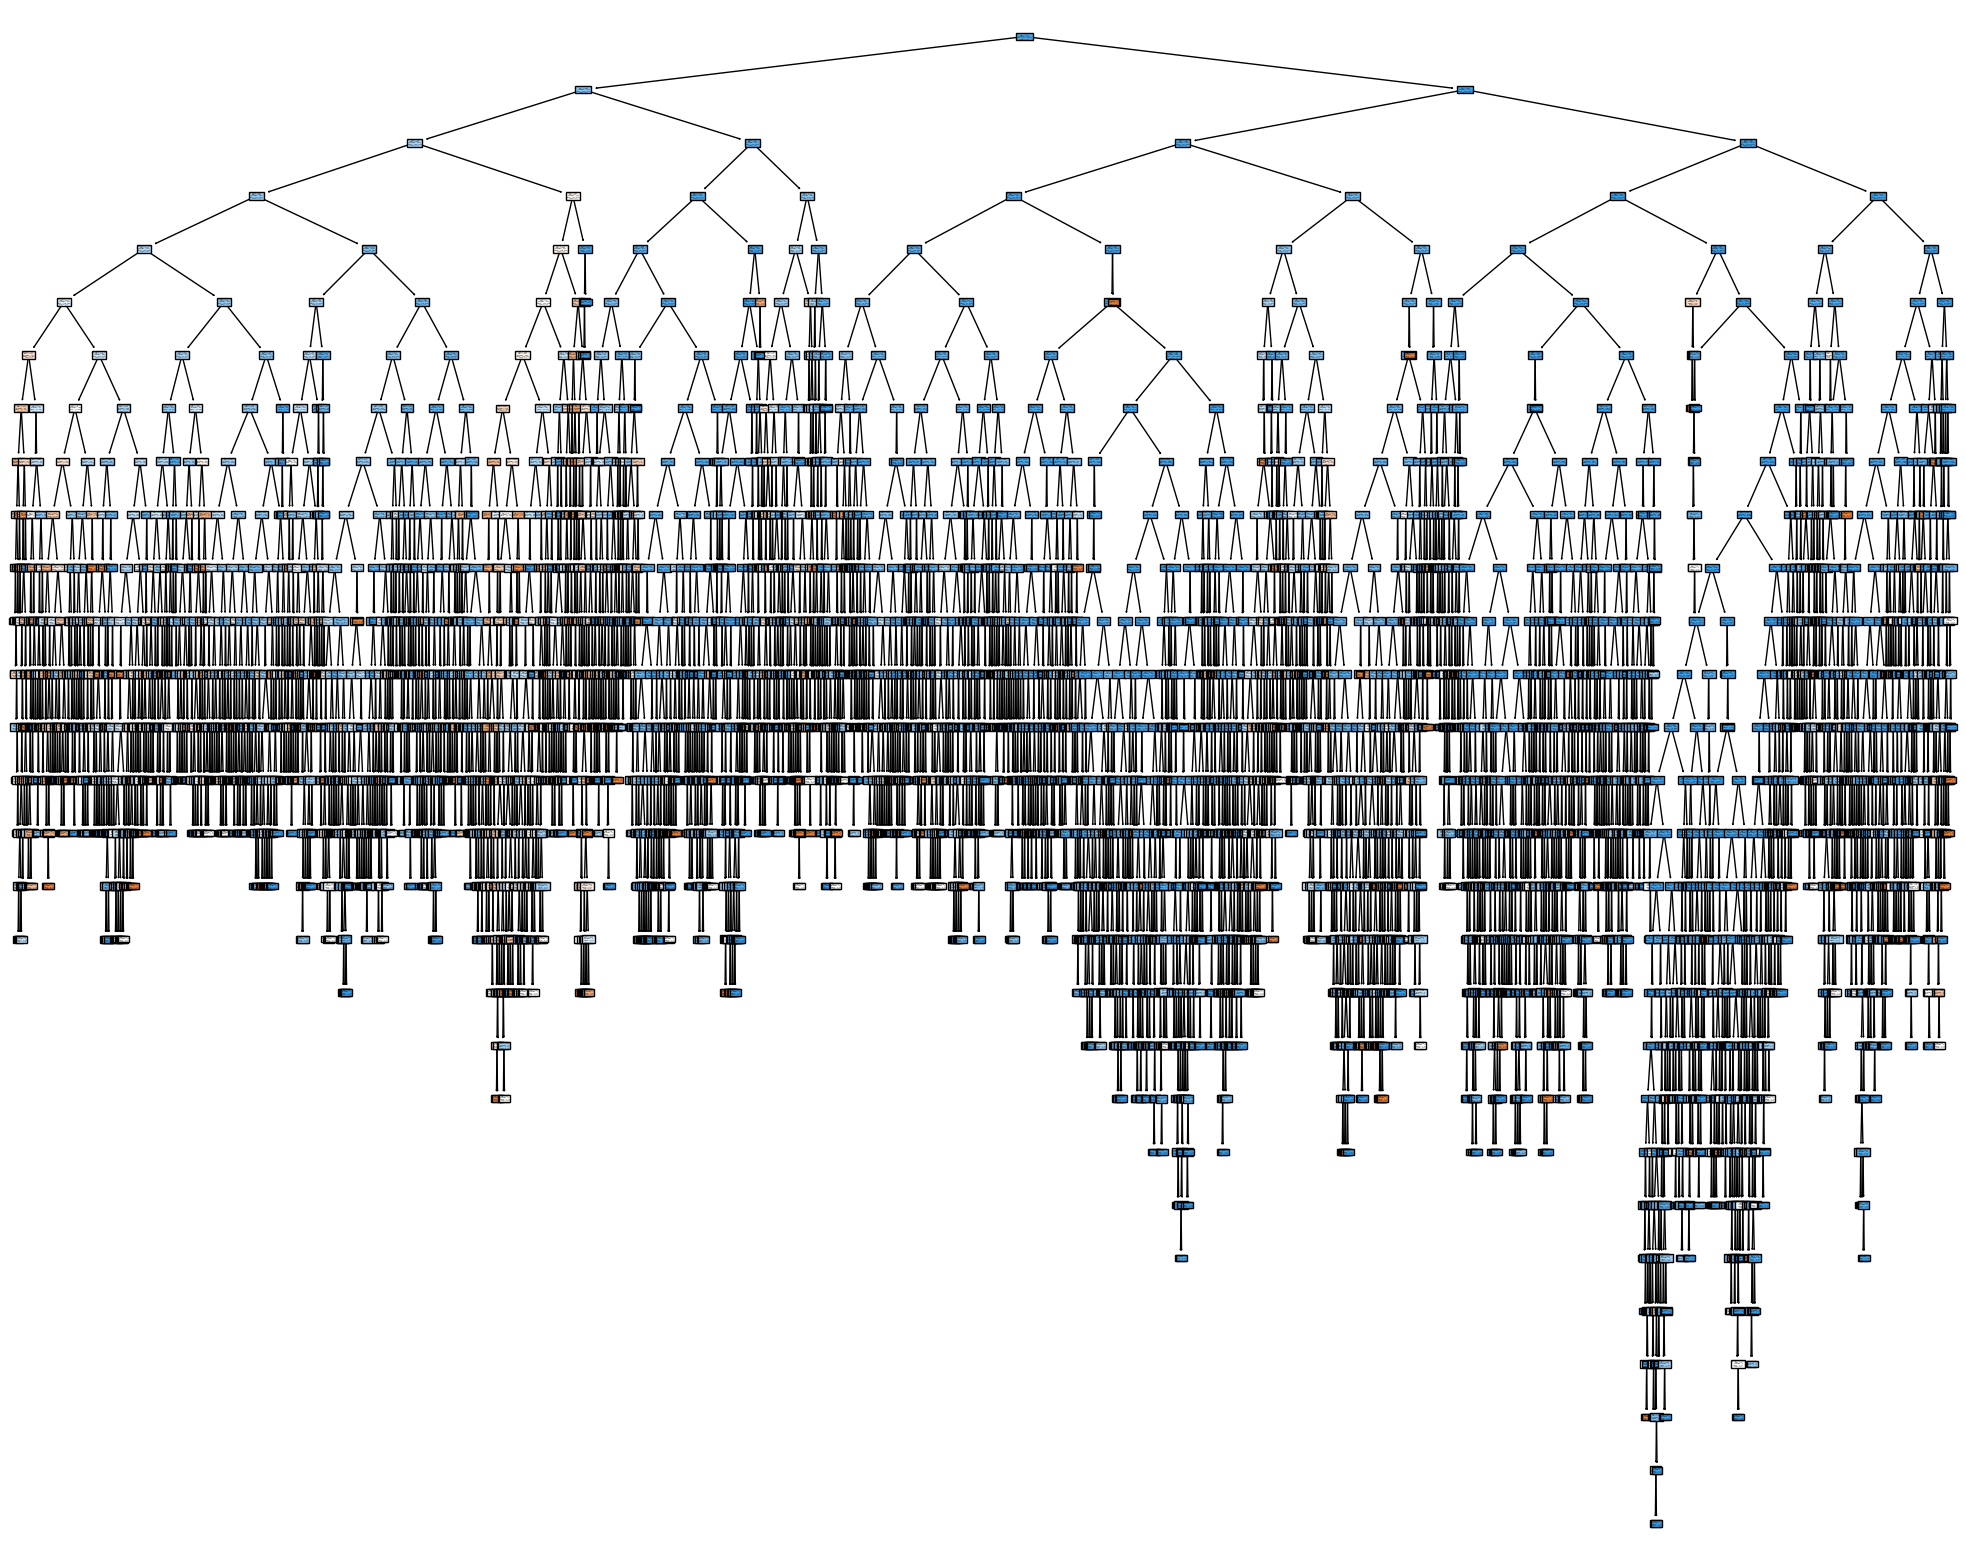

In [209]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=column_headers,  
                   class_names=feature_cols,
                   filled=True)

# Linear Regression (for salary prediction)<a name='regress' />
<a href=#ind>Go top</a>

In [73]:
dt_df3 = dt_df.copy().dropna()
dt_df3

,C#,C++,Java,JavaScript,PHP,Python,Ruby,SQL,Age,YearsCode,WorkExp,ConvertedCompYearly
8,0,0,0,0,0,0,0,0,34,6,6.0,0.000981
11,1,0,0,1,0,1,0,1,44,12,14.0,0.003888
12,0,0,0,0,0,0,0,1,34,12,5.0,0.001300
14,0,0,0,1,1,1,1,0,34,11,5.0,0.002200
21,0,0,0,0,0,1,0,1,34,5,4.0,0.000683
...,...,...,...,...,...,...,...,...,...,...,...,...
73110,1,0,0,1,0,0,0,0,34,13,9.0,0.001218
73112,0,0,1,1,0,0,0,0,34,10,3.0,0.001045
73113,1,1,0,0,0,0,0,0,34,7,7.0,0.001880
73116,1,0,1,1,0,0,0,0,44,21,16.0,0.002300


In [74]:
dt_df3['Age'] = dt_df3['Age'].astype(float)
dfmin = dt_df3['Age'].min()
dfmax = dt_df3['Age'].max()
val = (dt_df3['Age'] - dfmin) / (dfmax - dfmin)
dt_df3['Age'] = np.round(val,1)

dt_df3

,C#,C++,Java,JavaScript,PHP,Python,Ruby,SQL,Age,YearsCode,WorkExp,ConvertedCompYearly
8,0,0,0,0,0,0,0,0,0.3,6,6.0,0.000981
11,1,0,0,1,0,1,0,1,0.5,12,14.0,0.003888
12,0,0,0,0,0,0,0,1,0.3,12,5.0,0.001300
14,0,0,0,1,1,1,1,0,0.3,11,5.0,0.002200
21,0,0,0,0,0,1,0,1,0.3,5,4.0,0.000683
...,...,...,...,...,...,...,...,...,...,...,...,...
73110,1,0,0,1,0,0,0,0,0.3,13,9.0,0.001218
73112,0,0,1,1,0,0,0,0,0.3,10,3.0,0.001045
73113,1,1,0,0,0,0,0,0,0.3,7,7.0,0.001880
73116,1,0,1,1,0,0,0,0,0.5,21,16.0,0.002300


In [76]:
dt_df3['YearsCode'] = dt_df3['YearsCode'].astype(float)
dfmin = dt_df3['YearsCode'].min()
dfmax = dt_df3['YearsCode'].max()
val = (dt_df3['YearsCode'] - dfmin) / (dfmax - dfmin)
dt_df3['YearsCode'] = val

dt_df3

,C#,C++,Java,JavaScript,PHP,Python,Ruby,SQL,Age,YearsCode,WorkExp,ConvertedCompYearly
8,0,0,0,0,0,0,0,0,0.3,0.100000,6.0,0.000981
11,1,0,0,1,0,1,0,1,0.5,0.200000,14.0,0.003888
12,0,0,0,0,0,0,0,1,0.3,0.200000,5.0,0.001300
14,0,0,0,1,1,1,1,0,0.3,0.183333,5.0,0.002200
21,0,0,0,0,0,1,0,1,0.3,0.083333,4.0,0.000683
...,...,...,...,...,...,...,...,...,...,...,...,...
73110,1,0,0,1,0,0,0,0,0.3,0.216667,9.0,0.001218
73112,0,0,1,1,0,0,0,0,0.3,0.166667,3.0,0.001045
73113,1,1,0,0,0,0,0,0,0.3,0.116667,7.0,0.001880
73116,1,0,1,1,0,0,0,0,0.5,0.350000,16.0,0.002300


In [77]:
dt_df3['WorkExp'] = dt_df3['WorkExp'].astype(float)
dfmin = dt_df3['WorkExp'].min()
dfmax = dt_df3['WorkExp'].max()
val = (dt_df3['WorkExp'] - dfmin) / (dfmax - dfmin)
dt_df3['WorkExp'] = val

dt_df3

,C#,C++,Java,JavaScript,PHP,Python,Ruby,SQL,Age,YearsCode,WorkExp,ConvertedCompYearly
8,0,0,0,0,0,0,0,0,0.3,0.100000,0.12,0.000981
11,1,0,0,1,0,1,0,1,0.5,0.200000,0.28,0.003888
12,0,0,0,0,0,0,0,1,0.3,0.200000,0.10,0.001300
14,0,0,0,1,1,1,1,0,0.3,0.183333,0.10,0.002200
21,0,0,0,0,0,1,0,1,0.3,0.083333,0.08,0.000683
...,...,...,...,...,...,...,...,...,...,...,...,...
73110,1,0,0,1,0,0,0,0,0.3,0.216667,0.18,0.001218
73112,0,0,1,1,0,0,0,0,0.3,0.166667,0.06,0.001045
73113,1,1,0,0,0,0,0,0,0.3,0.116667,0.14,0.001880
73116,1,0,1,1,0,0,0,0,0.5,0.350000,0.32,0.002300


In [78]:
# https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

column_headers = dt_df3.keys().values.tolist()
column_headers
feature_cols = column_headers[0:len(column_headers)-1]
# label_cols = column_headers
label_cols = column_headers[len(column_headers)-1]

X = dt_df3[feature_cols] # Features
y = dt_df3[label_cols] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print('Intercept: ', regressor.intercept_)
print('Coef ', regressor.coef_)

Intercept:  0.0016360942747497813
Coef  [-2.71482888e-05  8.12089704e-05 -1.70006824e-04  3.19452354e-04
 -8.67977114e-04  8.78419417e-04  4.81019205e-04  2.15022730e-04
  7.48245834e-04 -4.83773769e-05  3.75351215e-03]


In [79]:
y_pred = regressor.predict(X_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

         Actual  Predicted
57909  0.000190   0.001349
5661   0.007740   0.002902
56211  0.001349   0.003043
72218  0.000135   0.003399
56973  0.000144   0.002156
...         ...        ...
51714  0.003748   0.003952
15225  0.003255   0.003727
8604   0.004800   0.004071
25     0.001813   0.002353
40624  0.002592   0.003700

[8097 rows x 2 columns]


In [80]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.7f}')
print(f'Mean squared error: {mse:.7f}')
print(f'Root mean squared error: {rmse:.7f}')

Mean absolute error: 0.0032604
Mean squared error: 0.0001460
Root mean squared error: 0.0120814


In [81]:
regressor.predict([[1, 0, 0, 1, 0, 0, 0, 0, 0.3, 0.20, 0.28]])

C:\Users\imrul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.00319418])